In [10]:
import geopandas as gpd
import xarray as xr
# import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import gzip
import shutil
import glob
# import rioxarray as rxr

In [11]:
# Set data directory
data_dir = "..\..\datasets\et\lsa_saf"

In [ ]:
os.listdir(data_dir)

In [ ]:
# Read AOI vector file



## Evapotranspiration pre-processing

### Read Evapotranspiration file

In [ ]:
''''
Study period: 2004 - 2024
'''

# Find all NetCDF files in the directory
all_files = glob.glob(data_dir + '/*.nc')

# Print the file list
all_files

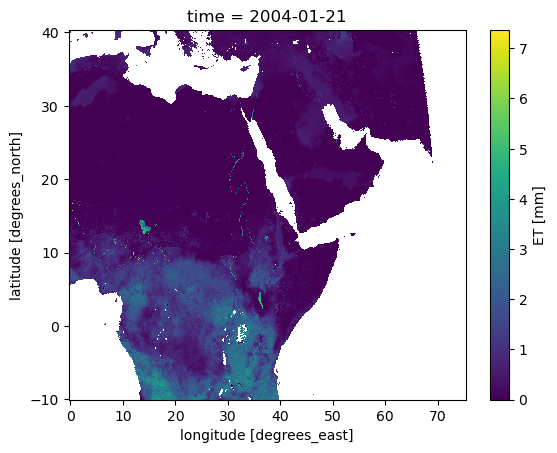

In [55]:
# Visualis the first entry
data_list[0]['ET'].sel(lat=slice(40.34,-10), lon=slice(-0.34,75.34)).plot()


#### Open and concatenate the netcdf file

In [ ]:
data_list = []
for i in all_files:
    data_list.append(xr.open_dataset(i))

et_data = xr.concat(data_list, dim='time')
et_data

#### Climatology - Calculate the anomalies

In [ ]:
# Calculate monthly climatology (mean for each month over the years)
et_climatology = et_data.groupby("time.month").mean("time")

# Calculate anomalies
et_anomalies = et_data.groupby("time.month") - et_climatology

# Calculate monthly standard deviation over the years
et_std_dev = et_data.groupby("time.month").std("time")


#### Standadize the anomalies

In [ ]:
# Standardize anomalies (optional)
et_standardized = et_anomalies / et_std_dev

In [ ]:
# TODO: Implement fitting marginal distribution to the data

In [ ]:
# TODO: Transform data to uniform margins